In [0]:
import tensorflow as tf

In [0]:
import os 
import numpy 
import matplotlib.pyplot as plt
import logging

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [7]:
print(tf.__version__)

2.2.0


In [8]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',extract=True , origin=_URL)

68608000/68606236 [==============================] - 2s 0us/step


In [10]:
#getting the structure of the directory 
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir) , 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir , 'train')
validation_dir = os.path.join(base_dir , 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [15]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) #generators and rescaling them to 0 and 1 by dividing 255

In [0]:
test_image_generator = ImageDataGenerator(rescale=1./255)

In [0]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [22]:
#flow from directory will be used to load from disk
train_data_gen = train_image_generator.flow_from_directory(
    batch_size = BATCH_SIZE,
    shuffle = True , 
    class_mode = 'binary',
    target_size = (150 , 150),
    directory = train_dir
)


Found 2000 images belonging to 2 classes.


In [25]:
validation_data_gen = train_image_generator.flow_from_directory(
    batch_size = BATCH_SIZE,
    shuffle = False , 
    class_mode = 'binary',
    target_size = (150 , 150),
    directory = validation_dir
)


Found 1000 images belonging to 2 classes.


In [0]:
sample_training_images , _ = next(train_data_gen) #The next function returns a batch from the dataset.
# One batch is a tuple of (many images, many labels). For right now, we're discarding the labels because we just want to look at the images.

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

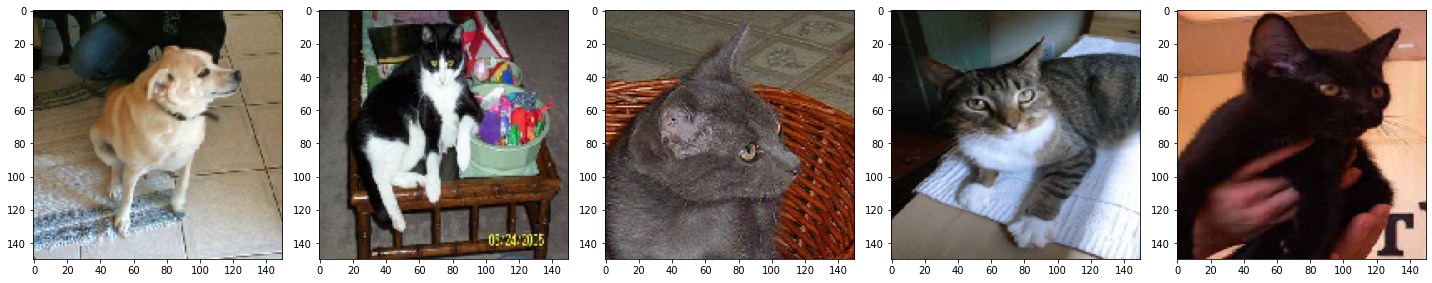

In [28]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [34]:
EPOCHS = 20
import numpy as np
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=validation_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/20
20/20 [==============================] - 10s 512ms/step - loss: 0.7325 - accuracy: 0.5015 - val_loss: 0.6923 - val_accuracy: 0.5080
Epoch 2/20
20/20 [==============================] - 10s 513ms/step - loss: 0.6925 - accuracy: 0.5255 - val_loss: 0.6860 - val_accuracy: 0.5040
Epoch 3/20
20/20 [==============================] - 10s 503ms/step - loss: 0.6686 - accuracy: 0.5930 - val_loss: 0.6459 - val_accuracy: 0.6240
Epoch 4/20
20/20 [==============================] - 10s 503ms/step - loss: 0.6452 - accuracy: 0.6255 - val_loss: 0.6218 - val_accuracy: 0.6670
Epoch 5/20
20/20 [==============================] - 10s 502ms/step - loss: 0.6092 - accuracy: 0.6665 - val_loss: 0.5883 - val_accuracy: 0.6850
Epoch 6/20
20/20 [==============================] - 10s 504ms/step - loss: 0.6059 - accuracy: 0.6765 - val_loss: 0.6140 - val_accuracy: 0.6560
Epoch 7/20
20/20 [==============================] - 10s 505ms/step - loss: 0.5646 - accuracy: 0.7095 - val_loss: 0.5778 - val_accuracy: 0.7040

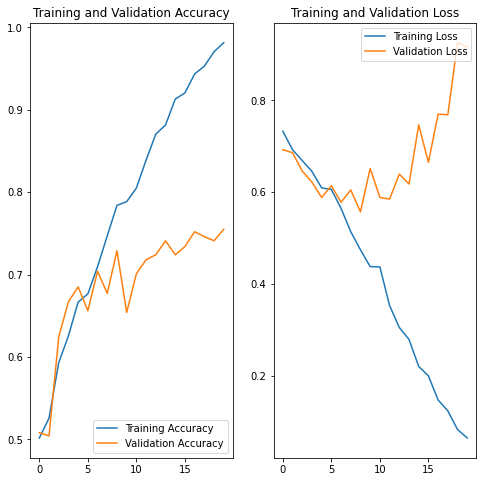

In [35]:

#visualizing 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()